In [9]:
from data_loader.task_source.CLDPackage import CLDPackage
from data_loader.task_source.CLDWorkersComp import CLDWorkersComp
from data_loader.task_source.TaskSourceFactory import TaskSourceFactory
from data_loader.rep.RepBuilder import RepBuilder
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import folium

## CLD Matrix Package Task Source

In [10]:
pkg_df = CLDPackage().load_data()
print(pkg_df.shape)
pkg_df.head(5)

(7322, 141)


LC_Supv LC_Rep RepRiskMatch AU_Rep_Level AU_Risk_Level GL_Rep_Level  \
0    None   None           No         None             1         None   
1    None   None           No         None             2         None   
2    None   None           No         None             2         None   
3    None   None           No         None           N/A         None   
4    None   None           No         None           N/A         None   

  GL_Risk_Level PR_Rep_Level PR_Risk_Level PL_Rep_Level PL_Risk_Level  \
0           N/A         None           N/A         None           N/A   
1           N/A         None           N/A         None           N/A   
2           N/A         None           N/A         None           N/A   
3             2         None           N/A         None             2   
4             2         None           N/A         None             2   

  WC_Rep_Level WC_Risk_Level   RMS   CSS  Team        Sales_Rep  \
0         None           N/A  None  None  None       Gary Banks   
1         None           N/A  None  None  None        Rick Nola   
2         None           N/A  None  None  None    Tom Krieghoff   
3         None             1  None  None  None  Steve Rosenbaum   
4         None           N/A  None  None  None         Jc Riter   

      Underwriter Agency_Code                             AGENCY_NAME  \
0   CONOR SCHMITT       34631           Kernan Insurance Agency, Inc.   
1      LISA MELOY       03063         First Arkansas Insurance Agency   
2  MATTHEW LUDWIG       05076              USI Insurance Services LLC   
3      DAVID LANE       12352                          Daniel & Henry   
4    MIKE MIRIZZI       36071  Brown & Brown Insurance Services, Inc.   

     Agency_Phone Agent_ST Client_ID Policy_Symbol Policy_number Policy_Mod  \
0  (614) 764-0121       OH   2328598           EPP       0746656       None   
1  (870) 541-0020       AR   1803452           EPP       0720052       None   
2  (303) 831-5164       CO   3408023           ENP       0745725       None   
3  (312) 332-1904       IL   0458829           EPP       0738643       None   
4  (541) 382-1611       OR   1538817           ENP       0679358       None   

             UW_Unit New_Renewal Effective_Date Policy_Term Expiration_Date  \
0  Commerical Middle        None     2025-05-15        1 YR      2026-05-15   
1  Commerical Middle        None     2025-06-30        3 YR      2027-06-30   
2  Commerical Middle        None     2025-05-01        1 YR      2026-05-01   
3  Commerical Middle        None     2025-02-10        1 YR      2026-02-10   
4  Commerical Middle        None     2024-03-08        3 YR      2027-03-08   

  Inspection_Frequency Due_Year_Qtr    Due_Date Proposed_Due_Date  \
0      3 Years Virtual         None  2025-11-16              None   
1      3 Years Virtual         None  2027-01-01              None   
2      3 Years Virtual         None  2025-11-02              None   
3      3 Years Virtual         None  2025-08-14              None   
4      3 Years Virtual         None  2026-09-09              None   

  Program_Insp_Type Override LC_Delegate Actual_Insp_Type Vendor_Insp_Level  \
0                LC     None        None               LC              None   
1                LC     None        None               LC              None   
2                LC     None        None               LC              None   
3                LC     None        None               LC              None   
4                LC     None        None               LC              None   

  HQ_Comments LC_Rep_Comments                    Insured_Name  Loc_Num  \
0        None            None  J & F CONSTRUCTION & DEVELOPME      1.0   
1        None            None      DANIELL AIR & ELECTRIC INC      1.0   
2        None            None  SAFETY ZONE TRAFFIC CONTROL, L      1.0   
3        None            None    Structures Construction, LLC      1.0   
4        None            None             GOLF LANDSCAPES INC      1.0  

In [11]:
pkg_df['UW_Unit'].value_counts()

UW_Unit
Commerical Middle                  5565
Commercial Key General Business    1352
Commercial Key Construction         336
Customer Care Centr                  35
Name: count, dtype: int64

## CLD Matrix Workers Comp Task Source

In [12]:
wc_df = CLDWorkersComp(pkg_df).load_data()
print(wc_df.shape)
wc_df.head(5)

(1057, 44)


PolicySymNum                 InsuredName EffectiveDate ExpirationDate  \
0   EWC0222843   EARL WALKER COMPANY, INC.    2025-02-01     2026-02-01   
1   EWC0227579                TRI ESCO INC    2025-02-18     2026-02-18   
2   EWC0229038  YARD HEATING & COOLING INC    2025-02-17     2026-02-17   
3   EWC0229702       JARVIS WELDING L.L.P.    2025-03-01     2026-03-01   
4   EWC0230492          GENERAL PIPING INC    2025-04-01     2026-04-01   

  Inspection_due_date Most_Recent_Inspector Last_Inspection_date  \
0          2025-08-05            Chad Rappe           2024-10-08   
1          2025-08-22        Stephen Shirey           2023-12-08   
2          2025-08-21                  None                 None   
3          2025-09-02                  None                 None   
4          2025-10-03                  None                 None   

  Proposed_Due_date HQ_Comments LC_Rep_Comments Agency_Code  \
0              None        None            None       12004   
1              None        None            None       13728   
2              None        None            None       12018   
3              None        None            None       12094   
4              None        None            None       13774   

                              AgencyName AgencyState Client_ID  \
0            Wood Insurance Agency, Inc.          IL   0731473   
1                 EPIC Insurance Midwest          IN   0264725   
2            Dimond Bros. Insurance, LLC          IL   0575149   
3  Town & Country Insurance Agency,  LTD          IL   0783583   
4                 EPIC Insurance Midwest          IN   0356623   

       pg_unit_desc       pg_pgm_desc Product             MailingAddress  \
0  Commercial Lines  Commercial Lines    None                  PO BOX 77   
1  Commercial Lines  Commercial Lines    None                PO BOX 6386   
2  Commercial Lines  Commercial Lines    None          100 S SPRESSER ST   
3  Commercial Lines  Commercial Lines    None              124 E PINE ST   
4  Commercial Lines  Commercial Lines    None  10917 E COUNTY ROAD 300 N   

    MailingCity MailingCounty MailingState MailingZip MainLocationAddress  \
0      SULLIVAN      MOULTRIE           IL      61951     915 W MAGILL ST   
1     LAFAYETTE    TIPPECANOE           IN      47903       101 N 36TH ST   
2   TAYLORVILLE     CHRISTIAN           IL      62568   100 S SPRESSER ST   
3        CANTON        FULTON           IL      61520        37 S 1ST AVE   
4  INDIANAPOLIS     HENDRICKS           IN      46234     1175 WESTERN DR   

   LocationCity LocationCounty LocationState LocationZip          LC_SUPV  \
0      SULLIVAN       MOULTRIE            IL       61951     Edward Lewis   
1     LAFAYETTE     TIPPECANOE            IN       47905  Jennifer Welday   
2   TAYLORVILLE      CHRISTIAN            IL       62568     Edward Lewis   
3        CANTON         FULTON            IL       61520     Edward Lewis   
4  INDIANAPOLIS         MARION            IN       46241  Jennifer Welday   

           LC_Rep   Team LC_Delegate KEY_RISK_MGMT_LC_NAME KEY_CONST_LC_NAME  \
0      Chad Rappe   None        None          Alisa Taylor       Mike Carson   
1  Stephen Shirey   None        None          Alisa Taylor       Mike Carson   
2      Chad Rappe   None        None          Alisa Taylor       Mike Carson   
3    Rachel Alger   None        None          Alisa Taylor       Mike Carson   
4   Debra Addante  IN/MI        None          Alisa Taylor       Mike Carson   

    sales_rep_name CurrentUnderwriter  Trigger  WCInforcePremium NAICSCode  \
0    Vanessa Barry      Gabby Taphorn  Trigger           68507.0    237310   
1  Bradley Zappala         Gail Adams     None           25323.0    541990   
2   Ryan Hillestad        Jamar Henry     None           32890.0    238220   
3    Craig Matthis         Jack Baker  Trigger           59981.0    238220   
4   Austin Stamper    Erica Robertson     None           35285.0    238220   

                                 

In [13]:
wc_df['pg_unit_desc'].value_counts()

pg_unit_desc
Commercial Lines    845
Key Accounts        205
CCCC                  6
Name: count, dtype: int64

## CLD Matrix Package Task Pool (due after 60 days but before 120 days)

Note - DATEDIFF(m,last_insp_date,due_date)

In [14]:
cld_pkg = TaskSourceFactory.create_task_sources("CLD_MATRIX_PACKAGE")
pkg_task_pool = cld_pkg.to_task_pool()[0]
print(pkg_task_pool.shape)
pkg_task_pool.head(5)


[WARN] County not found in region.csv: OCEAN in state OH. Error: index 0 is out of bounds for axis 0 with size 0
[WARN] County not found in region.csv: CAMPBELL in state OH. Error: index 0 is out of bounds for axis 0 with size 0
(743, 23)


task_id policy_number    due_date  \
0  2696524d-cda6-421e-8cde-758fb1df7d71    EPP0746656  2025-11-16   
1  55fa4a70-e38d-4f45-8fd5-dde2fca0cbe1    ENP0745725  2025-11-02   
2  af89a104-1d4e-487c-8ae5-2ce2541057d3    EPP0746656  2025-11-16   
3  fc56cd27-2f9f-4376-85a5-0bb886831d42    ETD0610244  2025-10-03   
4  024ac170-4af6-4dbf-a3de-4e344131e752    EPP0652082  2025-10-30   

  au_risk_level gl_risk_level pr_risk_level pl_risk_level wc_risk_level  \
0             1          None          None          None          None   
1             2          None          None          None          None   
2          None          None             1          None          None   
3          None          None             1          None          None   
4          None          None             1          None          None   

  agency_code last_inspection_group inspection_type insured_name  \
0       34631                  None         Virtual         None   
1       05076                  None         Virtual         None   
2       34631                  None         On-Site         None   
3       29003                  None         Virtual         None   
4       29014                  None         On-Site         None   

                        address       city state zip_code    county  \
0           2141 STATE ROUTE 19    BUCYRUS    OH    44820  CRAWFORD   
1                 599 S MAIN ST   BRIGHTON    CO    80601     ADAMS   
2                6617 BRANDT RD     GALION    OH    44833  CRAWFORD   
3              4101 WINSTON AVE  COVINGTON    KY    41015    KENTON   
4  2643-2763 SAWMILL PLACE BLVD   COLUMBUS    OH    43235  FRANKLIN   

    latitude   longitude     region              source  \
0  40.811585  -82.969375   OH/KY/WV  CLD_MATRIX_PACKAGE   
1  39.982306 -104.796650  Southwest  CLD_MATRIX_PACKAGE   
2  40.718636  -82.791132   OH/KY/WV  CLD_MATRIX_PACKAGE   
3  39.016548  -84.499691   OH/KY/WV  CLD_MATRIX_PACKAGE   
4  40.100748  -83.060409   OH/KY/WV  CLD_MATRIX_PACKAGE   

  agency_based_assigned_rep  loc_num  
0                      None      1.0  
1                      None      1.0  
2                      None      4.0  
3                CJ Johnson      2.0  
4                CJ Johnson      1.0

In [15]:
# Convert columns to datetime format
pkg_task_pool['due_date'] = pd.to_datetime(pkg_task_pool['due_date'])
pkg_task_pool['due_date'].describe()


count                              743
mean     2025-10-22 06:52:48.775235328
min                2025-10-01 00:00:00
25%                2025-10-03 00:00:00
50%                2025-10-23 00:00:00
75%                2025-11-02 00:00:00
max                2025-11-30 00:00:00
Name: due_date, dtype: object

## CLD Matrix Worker's Comp Task Pool (due after 60 days but before 120 days)

In [18]:
wc_task_pool = TaskSourceFactory.create_task_sources('CLD_MATRIX_WC', {"pkg_df": cld_pkg.get_raw_df()}).to_task_pool()[0]
print(wc_task_pool.shape)
wc_task_pool = wc_task_pool.sort_values(by='policy_number')  # Sort by policy_number
wc_task_pool.head(50)


(38, 23)


task_id policy_number    due_date  \
0   c2ecffaf-067f-4294-b7ad-a2017bae1ba5    EWC0307396  2025-10-02   
4   7453c67a-5286-4d2a-b35b-e09e3fd392ca    EWC0321715  2025-11-02   
5   70ed6587-36c6-4df5-a5f0-00ee1808c658    EWC0322407  2025-10-03   
6   062f3f03-74af-4441-8821-a911c4d4d860    EWC0333988  2025-11-02   
7   892e7b3d-d904-4db9-af20-55f45ce7235f    EWC0378899  2025-10-03   
8   2e8c2dcb-4c2e-4f0b-a702-9eea503a9191    EWC0379845  2025-10-03   
9   2a025a34-c39c-4eb5-9370-ce2fce035e09    EWC0382821  2025-10-03   
10  b41fc650-7810-49d0-ad65-060164a9acb9    EWC0433939  2025-10-17   
11  c5967913-58e1-4826-814e-4c725c77dd26    EWC0481252  2025-10-06   
12  34956d93-b8a1-44f6-959b-c8c85c429313    EWC0481698  2025-10-03   
13  5bcb7e8a-eff2-4ae4-badb-aaf4c2625e63    EWC0486214  2025-10-03   
14  5575492e-58fd-4468-93a3-c4e13faca9ec    EWC0491963  2025-11-16   
15  d7ebab04-8e68-49db-8c5c-522fc1801574    EWC0536344  2025-11-16   
16  5c710cbe-9d67-43fb-92e9-562f628cef9c    EWC0572764  2025-10-17   
17  cacab854-f19c-4f22-a62d-e4090712a973    EWC0573184  2025-10-06   
18  f3a523b6-6d87-4d95-b95f-32dcc313b6ac    EWC0573922  2025-10-14   
19  9a469841-0b92-475b-a757-4c79dfebf75f    EWC0609549  2025-10-03   
20  060e70ad-fed2-4518-9e65-b5ad80a683a6    EWC0610055  2025-10-03   
21  d5009097-093f-476f-b242-dc2edeb6d040    EWC0610751  2025-10-03   
22  7ba369da-ff01-4731-b6bc-d3496b12cccf    EWC0646464  2025-10-03   
23  4cf5af3d-1294-4f81-88e1-776975dea0b8    EWC0648522  2025-10-03   
24  ccb2bdd4-654c-4e75-b50d-befd2e20a00c    EWC0649027  2025-10-03   
25  b2097c15-2144-42e4-80b4-356e2e839309    EWC0650147  2025-11-02   
32  5482984d-337f-444a-9577-a164ca3030bf    EWC0652919  2025-11-11   
33  2b88ea79-0721-4c7c-a17d-9c9a88fccf5c    EWC0653954  2025-11-08   
34  76ee1167-5f28-4fed-809f-bb68d6233e32    EWC0680633  2025-10-08   
35  7c866620-171d-44c5-bdef-08b24fd6d3a1    EWC0681460  2025-10-03   
36  2c44ef39-bda8-4285-879c-f793e39a2f74    EWC0682736  2025-11-21   
37  86e87d2b-9a50-49c0-a1db-f8452364d851    EWC0683554  2025-10-31   
26  8a323a80-bcb5-4687-b1c8-52a836796a57    EWC0710009  2025-10-03   
27  a855bdd4-7259-46f4-b2bb-2c358ae881e1    EWC0711524  2025-10-02   
28  0e3a2621-79d5-4801-aee7-517f14dd7b2a    EWC0711691  2025-10-03   
29  1321c8cd-dcdc-4f66-af24-7bb92ab1bb96    EWC0713982  2025-11-02   
1   3cc1fdff-e4e9-4222-8b6f-2f7b9d6d3903    EWC0725181  2025-11-17   
2   12956f59-8b0a-47c6-aebb-da737f39fc2b    EWC0743061  2025-10-03   
3   f98edfbb-eb5e-42b2-a20e-233285d0dd83    EWC0744573  2025-10-20   
30  8eae45d0-12a6-4c9b-8ff2-35723627a8ed    EWC0745686  2025-11-02   
31  2e4ced92-1ac8-4e7a-80cb-30ff71c0021d    EWC0747197  2025-11-19   

   au_risk_level gl_risk_level pr_risk_level pl_risk_level wc_risk_level  \
0           None          None          None          None          None   
4           None          None          None          None          None   
5           None          None          None          None          None   
6           None          None          None          None          None   
7           None          None          None          None             2   
8           None          None          None          None          None   
9           None          None          None          None          None   
10          None          None          None          None             1   
11          None          None          None          None             2   
12          None          None          None          None             1   
13          None          None          None          None          None   
14          None          None          None          None             2   
15          None          None          None          None             2   
16          None          None          None          None          None   
17          None          None          None          None             2   
18          None          None          None          None          None   
19        

In [9]:
# Convert columns to datetime format
wc_task_pool['due_date'] = pd.to_datetime(wc_task_pool['due_date'])
wc_task_pool['due_date'].describe()

count                               38
mean     2025-10-17 09:28:25.263158016
min                2025-10-02 00:00:00
25%                2025-10-03 00:00:00
50%                2025-10-06 00:00:00
75%                2025-11-02 00:00:00
max                2025-11-21 00:00:00
Name: due_date, dtype: object

## Rep Data

In [10]:
df_rep_info = RepBuilder().load_rep_info()
print(df_rep_info.shape)
df_rep_info.head(5)

(370, 56)


Status             Group    Mode Manager          Team            RTD  \
0  Active  Field Consultant  Filled  Welday         IN/MI    Peters, Pat   
1  Active            Intern  Intern  Carson           NaN            NaN   
2  Active  Field Consultant  Filled  Carson  VA/Carolinas     Ward, John   
3  Active  Field Consultant  Filled   Lewis        Plains  Rubio, Adolfo   
4  Active       TSU Manager  Filled    Dale           NaN            NaN   

       HR Associate   CR YR  CR QTR  \
0    Addante, Debra     NaN     NaN   
1     Addison, John  2025.0  Summer   
2   Akeseh, Barbara     NaN     NaN   
3     Alger, Rachel     NaN     NaN   
4  Anderson, Kellie     NaN     NaN   

                     Notes, Description and Comments Emp ID  \
0                                                NaN  37107   
1                                 Summer 2025 Intern    NaN   
2  081623 Akeseh took Erhmanntraut position on 07...  41563   
3  Alger took Sandy Knott position who retired on...  44313   
4  051121: Anderson transitioned to Manager of Su...  36065   

                      Job Title Service Date   Dept Hire  DOT  Dept ID   Dept  \
0             Sr Field Director    6/23/2014   6/23/2014  NaN       50  Field   
1                        Intern    5/19/2025   5/19/2025  NaN       50  Field   
2                    Consultant    11/4/2020    1/4/2021  NaN       50  Field   
3             Sr Field Director   12/11/2023  12/11/2023  NaN       50  Field   
4  Technical Program Specialist    10/1/2012   10/1/2012  NaN       49     HQ   

     Loc Terr ST        Territory    Major City                      Street  \
0  Field      IN  IN-Indianapolis  Indianapolis      10522 Pine Valley Path   
1  Field     NaN              NaN           NaN  1320 Fillmore Avenue #135    
2  Field      SC               SC     Charlotte           10409 Ebbets Road   
3  Field      IL       IL-Central        Peoria       5302 W Pottstown Road   
4  Field     NaN              NaN           NaN         11362  2 Mile Rd NE   

           City State    Zip   Latitude   Longitude        Cell %23  \
0  Indianapolis    IN  46234  39.855061  -86.337021    630-202-9257   
1     Charlotte    NC  28203  35.202352  -80.843526  864-426-0772     
2     Charlotte    NC  28273  35.151829   -80.98365    239-241-3510   
3        Peoria    IL  61615  40.714981  -89.678238    309-216-0728   
4        Lowell    MI  49331  43.000511  -85.387192    616-481-3246   

     Office %23   AU Spec CONSTR Spec    KA CSS  KA Spec GL Spec PR Spec  \
0  630-202-9257   Scarski      Heiser    Carson   Taylor  Fisher  Pelley   
1           NaN       NaN         NaN       NaN      NaN     NaN     NaN   
2  239-241-3510  Holladay       Cheek  Franklin  Gaydosh  Fisher    Wood   
3  309-216-0728  Holladay       Cheek    Carson   Taylor  Fisher  Pelley   
4  616-481-3246       NaN         NaN       NaN      NaN     NaN     NaN   

  PL Spec   WC Spec Support Spec  ECP  Intern INT YR  \
0  Heiden    Ulrich      Hopkins  NaN     NaN    NaN   
1     NaN       NaN          NaN  NaN  Intern   2025   
2    Dion  Marcotte         Nafe  ECP  Intern   2020   
3  Heiden  Marcotte      Hopkins  NaN     NaN    NaN   
4     NaN       NaN       Saylor  NaN     NaN    NaN   

                             Replaced                       Email Relocated  \
0                     Rodocker, Jeff?    debra_addante@cinfin.com       Yes   
1                                 NaN     john_addison@cinfin.com        No   
2  Erhmanntraut, Mike and Moen, Londa   barbara_akeseh@cinfin.com       Yes   
3                        Knott, Sandy     rachel_alger@cinfin.com        No   
4                      Nussbaum, Kemp  kellie_anderson@cinfin.com        No   

   RCT Role  Rehire Hire Exp Curr Exp   AU   CN   GL   PL   PR   WC  \
0  Standard   False      TBD      TBD    2    3    2    2    2    2   
1       TBD   False      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Standard   False      TBD      TBD    1    1    1    1    

In [11]:
df_rep_tesk_count = RepBuilder().load_rep_task_count()
print(df_rep_tesk_count.shape)
df_rep_tesk_count.head(5)

(109, 7)


HR Associate  Insured_Survey_Count  Prospect_Survey_Count  \
0   Addante, Debra                   0.0                    0.0   
1  Akeseh, Barbara                   0.0                    0.0   
2    Alger, Rachel                   0.0                    0.0   
3      Anton, Ryan                   1.0                    0.0   
4       Ben, Kevin                   0.0                    0.0   

   Builders Risk Count  Risk Improvement Count Field  \
0                  0.0                           1.0   
1                  0.0                           NaN   
2                  0.0                           NaN   
3                  1.0                           0.0   
4                  0.0                           NaN   

   Coaching Mentoring Cotravel  Total  
0                          0.0    1.0  
1                          0.0    0.0  
2                          0.0    0.0  
3                          0.0    2.0  
4                          0.0    0.0

## Run the Engine

In [1]:
from engine.Engine import Engine
import pandas as pd
from openpyxl import Workbook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
engine = Engine("highest_score_first")
engine.run()

[WARN] County not found in region.csv: OCEAN in state OH. Error: index 0 is out of bounds for axis 0 with size 0
[WARN] County not found in region.csv: CAMPBELL in state OH. Error: index 0 is out of bounds for axis 0 with size 0


c:\Users\YWANG1\OneDrive - The Cincinnati Insurance Company\Workspace\LossControlAutomation\lc-demo\engine\Engine.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.task_pool = pd.concat([self.task_pool, task_pool], ignore_index=True)


In [2]:
len(engine.task_list)

781

In [3]:
result = engine.test_output_result
result.head(5)

engine_assignment engine_assignment_employee_id task_due_date policy_number  \
0      Benton, Dave                         38270    2025-10-01    EPP0236314   
1      Benton, Dave                         38270    2025-10-02    EPP0649143   
2      Benton, Dave                         38270    2025-10-02    EPP0610274   
3      Benton, Dave                         38270    2025-10-03    EPP0743199   
4      Benton, Dave                         38270    2025-10-03    EPP0430338   

                                task_id  task_loc_num  engine_score  \
0  243bf4bb-21ea-48d2-9642-432899d6bfb0           1.0      1.000000   
1  8f7d907b-5c2f-46b4-ae57-d1b34a13c2ba           1.0      0.991667   
2  73fe325a-d7e3-4501-8a1f-a8fb3b546dec           1.0      0.991667   
3  0fe0eb89-efab-4bfe-bc0a-7e3c72c33876           1.0      0.983333   
4  aef5f7d0-7419-4b5a-82ba-38bad126302c           1.0      0.983333   

   engine_distance_score  engine_risk_level_score  engine_due_date_score  \
0               0.021790                      1.0               1.000000   
1               0.023239                      1.0               0.983333   
2               0.085150                      1.0               0.983333   
3               0.080561                      1.0               0.966667   
4               0.044718                      1.0               0.966667   

   engine_agency_score  engine_balance_score engine_assigned_rep_region  \
0                  1.0                   1.0               VA/Carolinas   
1                  1.0                   1.0               VA/Carolinas   
2                  1.0                   1.0               VA/Carolinas   
3                  1.0                   1.0               VA/Carolinas   
4                  1.0                   1.0               VA/Carolinas   

  engine_assigned_rep_team  is_rep_key_account task_region     distance  \
0               Ward, John               False        West  2469.039695   
1               Ward, John               False        West  2310.088728   
2               Ward, John               False  NE OH/W PA   571.884769   
3               Ward, John               False   Northeast   609.049010   
4               Ward, John               False      Plains  1161.787422   

  engine_assigned_rep_au_level task_au_risk_level  \
0                            1               None   
1                            1                  1   
2                            1                  1   
3                            1                  1   
4                            1                  1   

  engine_assigned_rep_gl_level task_gl_risk_level  \
0                            2                  2   
1                            2               None   
2                            2               None   
3                            2               None   
4                            2               None   

  engine_assigned_rep_pl_level task_pl_risk_level  \
0                            2                  2   
1                            2               None   
2                            2               None   
3                            2               None   
4                            2               None   

  engine_assigned_rep_pr_level task_pr_risk_level  \
0                            2               None   
1                            2               None   
2                            2               None   
3                            2               None   
4                            2               None   

  engine_assigned_rep_wc_level task_wc_risk_level         task_source  \
0                            2               None  CLD_MATRIX_PACKAGE   
1                            2               None  CLD_MATRIX_PACKAGE   
2                            2               None  CLD_MATRIX_PACKAGE   
3                            2               None  CLD_MATRIX_PACKAGE   
4                            2               None  CLD_MATRIX_PACKAGE   

              

In [4]:
engine.rep_assignment_summary

rep_name  key_account         rep_team  task_count  \
0          Addante, Debra         True      Peters, Pat           1   
1         Akeseh, Barbara        False       Ward, John           0   
2           Alger, Rachel         True    Rubio, Adolfo           0   
3             Anton, Ryan         True      Hirt, Kevin           2   
4              Ben, Kevin        False      Evans, Jeff           0   
5            Benton, Dave        False       Ward, John           0   
6           Bradley, John        False    Rubio, Adolfo           2   
7      Bramblett, Phillip        False      Evans, Jeff           0   
8        Brennan, Kiernan        False  Dandurand, Jana           0   
9          Brinton, Floyd         True      Hirt, Kevin           0   
10             Brown, Lee        False      Peters, Pat           0   
11            Brown, Matt        False      Peters, Pat           3   
12          Bunney, Kayla        False  Dandurand, Jana           4   
13           Bunney, Zach         True  Dandurand, Jana           2   
14          Casar, Daniel        False      Evans, Jeff           0   
15        Clevenger, Anna        False    Rubio, Adolfo           1   
16        Courtney, Scott         True       Ward, John           3   
17         Crum, Danielle         True      Evans, Jeff           0   
18         Czerkis, Chris        False      Peters, Pat           2   
19           Dahms, Chris        False      Hirt, Kevin           0   
20          Damrow, Kalli         True  Dandurand, Jana           2   
21          DeRemer, Adam        False      Peters, Pat           0   
22     DeSormeau, Jeffrey        False  Dandurand, Jana           4   
23            Dick, Kathy        False       Ward, John           0   
24        Distefano, John         True      Evans, Jeff           0   
25         Ericson, Rylie        False  Dandurand, Jana           0   
26       Erisman, Patrick         True    Rubio, Adolfo           2   
27        Eubanks, Robert         True       Ward, John           0   
28     Farrar-Brown, Jill         True      Evans, Jeff           0   
29         Forrest, Craig        False      Peters, Pat           2   
30         Forrest, Jerry        False      Peters, Pat           0   
31          Gannon, Neely        False      Evans, Jeff           0   
32        Gordon, Michael        False      Peters, Pat           0   
33           Griinke, Dan         True      Peters, Pat           3   
34           Grimm, Kevin        False       Ward, John           0   
35         Guajardo, Noel         True    Rubio, Adolfo           0   
36          Gwidt, Ashley         True  Dandurand, Jana           0   
37             Hall, Anna         True      Evans, Jeff           0   
38          Hanley, Marty        False  Dandurand, Jana           2   
39          Hansen, Haley        False  Dandurand, Jana           2   
40     Hartsuck, Christal        False    Rubio, Adolfo           4   
41         Helton, Kristy         True       Ward, John           2   
42          Herndon, Mike         True      Peters, Pat           2   
43         Holstege, Nate         True      Peters, Pat           4   
44              Ims, Cory         True  Dandurand, Jana           2   
45    Johnson, CJ (Cyril)        False      Hirt, Kevin           0   
46           Jones, David        False       Ward, John           0   
47     Jurgelonis, Joseph         True       Ward, John           0   
48          Kaufman, Jake        False       Ward, John           0   
49        Kristof, Robert        False    Rubio, Adolfo           0   
50          Kult, Chelsea        False    Rubio, Adolfo           1   
51        Langner, Daniel         True       Ward, John           2   
52            Lario, Mark        False      Evans, Jeff           0   
53         Lowry, Brennan         True    Rubio, Adolfo           0   
54       Maddens, Tiffany         True       Ward, John           0   
55       Maggiaro, Ronald        False   

Average score: 0.7763676485899601
Average distance_score: 0.61883282930383 Weight: 2
Average risk_level_score: 0.9156850192061461 Weight: 3
Average due_date_score: 0.6491890738369612 Weight: 4
Average agency_score: 0.7516005121638925 Weight: 1
Average balance_score: 0.9630601792573624 Weight: 0


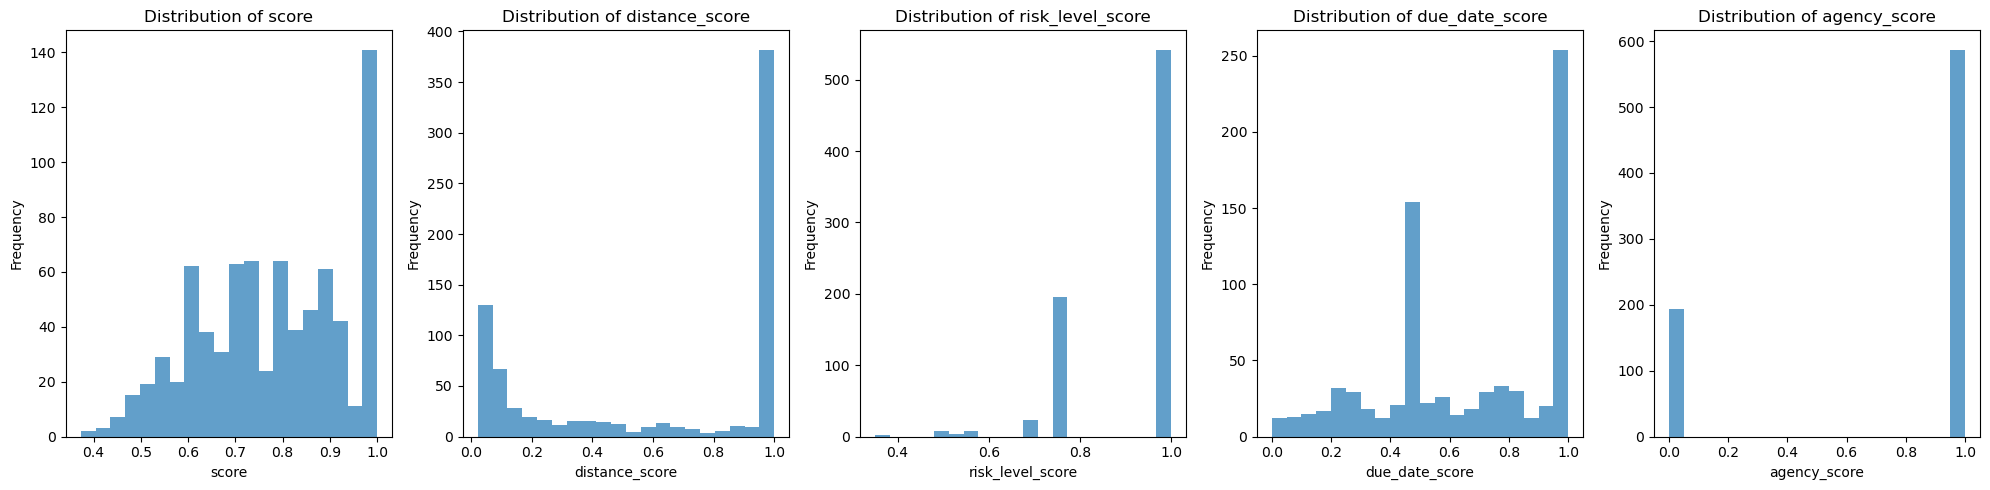

Average distance for On-Site inspections: 65.70533306829411


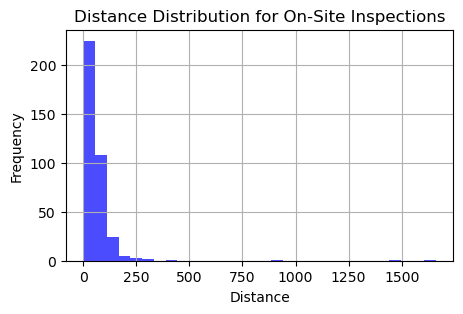

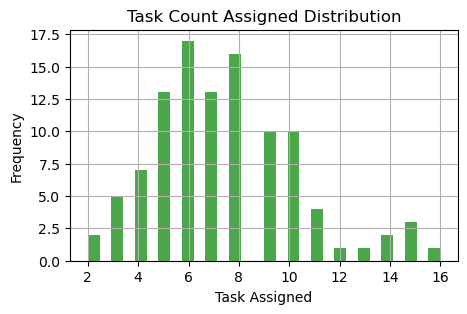

Reps with no tasks assigned: 0
Tasks not assigned: 0


In [5]:
engine.get_result_summary()

In [19]:
task_pool = engine.task_pool

(911, 22)

In [20]:
task_pool[task_pool['policy_number'] == 'EPP0739174']

Empty DataFrame
Columns: [task_id, policy_number, due_date, au_risk_level, gl_risk_level, pr_risk_level, pl_risk_level, wc_risk_level, agency_code, last_inspection_group, inspection_type, insured_name, address, city, state, zip_code, county, latitude, longitude, region, source, agency_based_assigned_rep]
Index: []

## Stats in Result

In [ ]:
result.info()

In [ ]:
import matplotlib.pyplot as plt

# Filter rows where task_inspection_type is "On-Site"
on_site_df = result[result['task_inspection_type'] == "On-Site"]

# Plot the distance distribution
plt.figure(figsize=(10, 6))
plt.hist(on_site_df['distance'], bins=30, color='blue', alpha=0.7)
plt.title('Distance Distribution for On-Site Inspections')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# show the rows where distance is greater than 1250
out_of_range_df = result[result['distance'] > 1250]
out_of_range_df

In [ ]:
engine.task_pool.info()

In [ ]:
# Extract rep_id, latitude, and longitude from engine.rep_dict
rep_lat_lon_data = [{'rep_id': rep_id, 'latitude': rep_info.latitude, 'longitude': rep_info.longitude}
                    for rep_id, rep_info in engine.rep_dict.items()]

# Create a DataFrame
rep_lat_lon_df = pd.DataFrame(rep_lat_lon_data)

# Display the DataFrame
rep_lat_lon_df.head()


In [ ]:
rep_lat_lon_df.info()

In [ ]:
# Create a map centered at the average latitude and longitude
center_lat = engine.task_pool['latitude'].mean()
center_lon = engine.task_pool['longitude'].mean()
task_pool_map = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add markers for each row in the task_pool
for _, row in engine.task_pool.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"Task ID: {row['task_id']}", 
                  icon=folium.Icon(color='blue')).add_to(task_pool_map)

# Add markers for each row in the rep_lat_lon_df
for _, row in rep_lat_lon_df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"Rep ID: {row['rep_id']}", 
                  icon=folium.Icon(color='red')).add_to(task_pool_map)

# Display the map
task_pool_map

## Generate Final Output

In [6]:
# TODO: modify the code, so that for each row in filtered_pkg_df, the "LC_Delegate" column should be the "engine_assignment" in the corresponding row in the result DataFrame.
result = engine.test_output_result
pkg_df = engine.raw_data['CLD_MATRIX_PACKAGE'].copy()
wc_df = engine.raw_data['CLD_MATRIX_WC'].copy()

# Filter pkg_df based on matching identifiers
filtered_pkg_df = pkg_df[pkg_df['task_id'].isin(result['task_id'])]

# # Map "engine_assignment" to "LC_Delegate" in filtered_pkg_df
filtered_pkg_df['LC_Delegate'] = filtered_pkg_df['task_id'].map(result.set_index('task_id')['engine_assignment'])

# Display the filtered DataFrame
filtered_pkg_df.shape

filtered_wc_df = wc_df[wc_df['task_id'].isin(result['task_id'])]

# # Map "engine_assignment" to "LC_Delegate" in filtered_wc_df
filtered_wc_df['LC_Delegate'] = filtered_wc_df['task_id'].map(result.set_index('task_id')['engine_assignment'])

# Display the filtered DataFrame
filtered_pkg_df.head(5)


C:\Users\YWANG1\AppData\Local\Temp\ipykernel_33964\3101422645.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pkg_df['LC_Delegate'] = filtered_pkg_df['task_id'].map(result.set_index('task_id')['engine_assignment'])
C:\Users\YWANG1\AppData\Local\Temp\ipykernel_33964\3101422645.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wc_df['LC_Delegate'] = filtered_wc_df['task_id'].map(result.set_index('task_id')['engine_assignment'])


LC_Supv      LC_Rep RepRiskMatch AU_Rep_Level AU_Risk_Level  \
0              None        None           No         None             1   
2              None        None           No         None             2   
7              None        None           No         None           N/A   
30  Darnell Johnson  CJ Johnson          Yes            2           N/A   
32  Darnell Johnson  CJ Johnson          Yes            2           N/A   

   GL_Rep_Level GL_Risk_Level PR_Rep_Level PR_Risk_Level PL_Rep_Level  \
0          None           N/A         None           N/A         None   
2          None           N/A         None           N/A         None   
7          None           N/A         None             1         None   
30            2           N/A            2             1            2   
32            2           N/A            2             1            2   

   PL_Risk_Level WC_Rep_Level WC_Risk_Level             RMS          CSS  \
0            N/A         None           N/A            None         None   
2            N/A         None           N/A            None         None   
7            N/A         None           N/A            None         None   
30           N/A            2           N/A  Tom Bildheiser  Mark Wieder   
32           N/A            2           N/A  Tom Bildheiser  Mark Wieder   

           Team        Sales_Rep       Underwriter Agency_Code  \
0          None       Gary Banks     CONOR SCHMITT       34631   
2          None    Tom Krieghoff    MATTHEW LUDWIG       05076   
7          None       Gary Banks     CONOR SCHMITT       34631   
30  MidAtlantic  Caroline Ledgin  MORGAN HOLZSCHUH       29003   
32  MidAtlantic  Caroline Ledgin  MORGAN HOLZSCHUH       29014   

                                     AGENCY_NAME    Agency_Phone Agent_ST  \
0                  Kernan Insurance Agency, Inc.  (614) 764-0121       OH   
2                     USI Insurance Services LLC  (303) 831-5164       CO   
7                  Kernan Insurance Agency, Inc.  (614) 764-0121       OH   
30        Couch Braunsdorf Insurance Group, Inc.  (800) 542-1700       NJ   
32  Acrisure NJ Partners Insurance Services, LLC  (201) 727-0070       NJ   

   Client_ID Policy_Symbol Policy_number Policy_Mod            UW_Unit  \
0    2328598           EPP       0746656       None  Commerical Middle   
2    3408023           ENP       0745725       None  Commerical Middle   
7    2328598           EPP       0746656       None  Commerical Middle   
30   1084054           ETD       0610244       None  Commerical Middle   
32   1408391           EPP       0652082       None  Commerical Middle   

   New_Renewal Effective_Date Policy_Term Expiration_Date  \
0         None     2025-05-15        1 YR      2026-05-15   
2         None     2025-05-01        1 YR      2026-05-01   
7         None     2025-05-15        1 YR      2026-05-15   
30        None     2025-04-01        1 YR      2026-04-01   
32        None     2025-04-28        1 YR      2026-04-28   

   Inspection_Frequency Due_Year_Qtr   Due_Date Proposed_Due_Date  \
0       3 Years Virtual         None 2025-11-16              None   
2       3 Years Virtual         None 2025-11-02              None   
7       3 Years On-Site         None 2025-11-16              None   
30      3 Years Virtual         None 2025-10-03              None   
32      3 Years On-Site         None 2025-10-30              None   

   Program_Insp_Type Override        LC_Delegate Actual_Insp_Type  \
0                 LC     None       Dahms, Chris               LC   
2                 LC     None  Weicksel, Clinton               LC   
7                 LC     None        Lario, Mark               LC   
30                LC     None   Brennan, Kiernan               LC   
32                LC     None     Spradlin, Troy               LC   

   Vendor_Insp_Level HQ_Comments LC_Rep_Comments  \
0               None        None            None   
2               None        None            None   
7      

In [15]:
# Identify rows where the (policy_number, task_address) pair is not unique
duplicated_rows = filtered_pkg_df[filtered_pkg_df.duplicated(subset=['Policy_number', 'Address'], keep=False)]

# Display the duplicated rows
duplicated_rows


LC_Supv          LC_Rep RepRiskMatch AU_Rep_Level AU_Risk_Level  \
2791  Jennifer Welday     Dan Griinke           No            2           N/A   
2793  Jennifer Welday     Dan Griinke           No            2           N/A   
3506  Jennifer Welday  Stephen Shirey          Yes            2           N/A   
3507  Jennifer Welday  Stephen Shirey          Yes            2           N/A   
3917        John Ward   Kristy Helton           No            2           N/A   
3929        John Ward   Kristy Helton          Yes            2           N/A   

     GL_Rep_Level GL_Risk_Level PR_Rep_Level PR_Risk_Level PL_Rep_Level  \
2791            2             2            2           N/A            1   
2793            2           N/A            2             2            1   
3506            2           N/A            3             1            2   
3507            2           N/A            3             1            2   
3917            2           N/A            2             3            1   
3929            2           N/A            2             2            1   

     PL_Risk_Level WC_Rep_Level WC_Risk_Level               RMS  \
2791             3            2           N/A  Matthew Ingraham   
2793             3            2           N/A  Matthew Ingraham   
3506           N/A            2           N/A      Alisa Taylor   
3507           N/A            2           N/A      Alisa Taylor   
3917           N/A            1           N/A    Tom Bildheiser   
3929           N/A            1           N/A    Tom Bildheiser   

                  CSS        Team         Sales_Rep       Underwriter  \
2791  Mark Hertzfeldt  Chicago/WI        Tim Wright       DOUG PLANCK   
2793  Mark Hertzfeldt  Chicago/WI        Tim Wright       DOUG PLANCK   
3506      Mike Carson       IN/MI  Alexa Stickelman  JASON SCHOENFELD   
3507      Mike Carson       IN/MI  Alexa Stickelman  JASON SCHOENFELD   
3917   Chris Franklin   Southeast       Josh Cooper    JASON TOWNSEND   
3929   Chris Franklin   Southeast       Josh Cooper    JASON TOWNSEND   

     Agency_Code                                        AGENCY_NAME  \
2791       48138                       M3 Insurance Solutions, Inc.   
2793       48138                       M3 Insurance Solutions, Inc.   
3506       13775  Acrisure Great Lakes Partners Insurance Servic...   
3507       13775  Acrisure Great Lakes Partners Insurance Servic...   
3917       41078                                   Propel Insurance   
3929       41078                                   Propel Insurance   

        Agency_Phone Agent_ST Client_ID Policy_Symbol Policy_number  \
2791  (608) 273-0655       WI   0335203           EPP       0569087   
2793  (608) 273-0655       WI   0335203           EPP       0569087   
3506  (765) 284-4443       IN   0971171           EPP       0655500   
3507  (765) 284-4443       IN   0971171           EPP       0655500   
3917  (865) 982-4111       TN   0404833           ETD       0610592   
3929  (865) 982-4111       TN   0404833           ETD       0610592   

     Policy_Mod            UW_Unit New_Renewal Effective_Date Policy_Term  \
2791       None  Commerical Middle        None     2025-01-28        3 YR   
2793       None  Commerical Middle        None     2025-01-28        3 YR   
3506       None  Commerical Middle        None     2025-05-26        1 YR   
3507       None  Commerical Middle        None     2025-05-26        1 YR   
3917       None  Commerical Middle        None     2025-04-01        1 YR   
3929       None  Commerical Middle        None     2025-04-01        1 YR   

     Expiration_Date Inspection_Frequency Due_Year_Qtr    Due_Date  \
2791      2026-04-01      3 Years Virtual         None  2025-10-03   
2793      2026-04-01      3 Years On-Site         None  2025-10-03   
3506      2026-05-26      3 Years On-Site         None  2025-11-27   
3507      2026-05-26      3 Years On-Site         None  2025-11-27   
3917      2026-04-01      3 Years On-Site         No

In [16]:
# Identify rows where the (policy_number, task_address) pair is not unique
duplicated_rows = result[result.duplicated(subset=['policy_number', 'task_address'], keep=False)]

# Display the duplicated rows
duplicated_rows

engine_assignment engine_assignment_employee_id task_due_date  \
118   Eubanks, Robert                         38978    2025-10-03   
164   Slawski, Robert                         36064    2025-10-03   
441    Helton, Kristy                         38875    2025-10-03   
443    Helton, Kristy                         38875    2025-10-03   
535   Shirey, Stephen                         39502    2025-11-27   
536   Shirey, Stephen                         39502    2025-11-27   

    policy_number                               task_id  task_loc_num  \
118    EPP0569087  5f0a6c9d-e75b-4199-bb83-224b4073a4f8           1.0   
164    EPP0569087  72e5b27f-d6fd-432c-b1ba-8082a0b9f933           5.0   
441    ETD0610592  e86a6f49-4969-4054-b544-281207e537a6           3.0   
443    ETD0610592  a7f06560-743b-4852-b971-6ff4c22a51bf           1.0   
535    EPP0655500  92dc83b0-2d46-4b04-9a00-62a04e502687           1.0   
536    EPP0655500  e80a723f-d89b-40c1-a912-1f6911e1584a           2.0   

     engine_score  engine_distance_score  engine_risk_level_score  \
118      0.983333               0.072193                     1.00   
164      0.911667               1.000000                     0.75   
441      0.986667               1.000000                     1.00   
443      0.896667               1.000000                     0.70   
535      0.470000               1.000000                     0.50   
536      0.470000               1.000000                     0.50   

     engine_due_date_score  engine_agency_score  engine_balance_score  \
118               0.966667                  1.0              1.000000   
164               0.966667                  1.0              1.000000   
441               0.966667                  1.0              0.866667   
443               0.966667                  1.0              0.866667   
535               0.050000                  1.0              1.000000   
536               0.050000                  1.0              1.000000   

    engine_assigned_rep_region engine_assigned_rep_team  is_rep_key_account  \
118               VA/Carolinas               Ward, John                True   
164                 Chicago/WI              Peters, Pat                True   
441                  Southeast               Ward, John                True   
443                  Southeast               Ward, John                True   
535                      IN/MI              Peters, Pat                True   
536                      IN/MI              Peters, Pat                True   

    task_region    distance engine_assigned_rep_au_level task_au_risk_level  \
118  Chicago/WI  688.985979                            2               None   
164  Chicago/WI    7.279892                            2               None   
441   Southeast   56.447676                            2               None   
443   Southeast   56.447676                            2               None   
535       IN/MI   16.738054                            2               None   
536       IN/MI   16.738054                            2               None   

    engine_assigned_rep_gl_level task_gl_risk_level  \
118                            2                  2   
164                            3               None   
441                            2               None   
443                            2               None   
535                            2               None   
536                            2               None   

    engine_assigned_rep_pl_level task_pl_risk_level  \
118                            3                  3   
164                            3                  3   
441                            1               None   
443                            1               None   
535                            2               None   
536                            2               None   

    engine_assigned_rep_pr_level task_pr_risk_level  \
118                            2               None   
164                   

In [17]:
filtered_pkg_df['LC_Delegate'].isnull().sum()

0

In [7]:
name_dict = {
    'Brent Von Kanel': ('Brent', 'Von Kanel'),
    'Luz Maria Rodriguez': ('Luz Maria', 'Rodriguez'),
    'Adam Deremer': ('Adam', 'DeRemer'),
    'Albert Gloer': ('Bert', 'Gloer'),
    'Bernard Mcclinton': ('Bernard', 'McClinton'),
    'Celeste Vanhoutte': ('Celeste', 'VanHoutte'),
    'Christopher Czerkis': ('Chris', 'Czerkis'),
    'CJ Johnson': ('CJ (Cyril)', 'Johnson'),
    'Connor Mccarthy': ('Connor', 'McCarthy'),
    'Corey Mcilvoy': ('Corey', 'McIlvoy'),
    'Doug Phillips': ('Douglas', 'Phillips'),
    'Jeff Evans': ('Jeffrey', 'Evans'),
    'Jeffrey Desormeau': ('Jeffrey', 'DeSormeau'),
    'Jeremy Mccord': ('Jeremy', 'McCord'),
    'Michelle Mcdermott': ('Michelle', 'McDermott'),
    'Mike Scarski': ('Michael', 'Scarski'),
    'Nathan Holstege': ('Nate', 'Holstege'),
    'Pat Peters': ('Patrick', 'Peters'),
    'Randy Tuszka': ('Randal', 'Tuszka'),
    'Rob Eubanks': ('Robert', 'Eubanks'),
    'Robb Slawski': ('Robert', 'Slawski'),
    'Ron Sharer': ('Ronald', 'Sharer'),
    'Zachary Bunney': ('Zach', 'Bunney'),
    'Clint Weicksel': ('Clinton', 'Weicksel'),
    'Jana Talley': ('Jana', 'Dandurand')
}

# Reverse the name_dict to map from (first, last) to original name
reverse_name_dict = {f"{last}, {first}": original for original, (first, last) in name_dict.items()}

def reverse_format_name(row):
    name = row['LC_Delegate']
    if name in reverse_name_dict:
        return reverse_name_dict[name]
    elif ',' in name:
        try:
            last, first = name.split(', ')
            return f"{first} {last}"
        except ValueError:
            return name
    else:
        return name

filtered_pkg_df['LC_Delegate'] = filtered_pkg_df.apply(
    lambda row: reverse_format_name(row) if not row['LC_Delegate'].startswith('TEAM') else row['LC_Delegate'],
    axis=1
)

filtered_wc_df['LC_Delegate'] = filtered_wc_df.apply(
    lambda row: reverse_format_name(row) if not row['LC_Delegate'].startswith('TEAM') else row['LC_Delegate'],
    axis=1
)


C:\Users\YWANG1\AppData\Local\Temp\ipykernel_33964\1445987080.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pkg_df['LC_Delegate'] = filtered_pkg_df.apply(
C:\Users\YWANG1\AppData\Local\Temp\ipykernel_33964\1445987080.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wc_df['LC_Delegate'] = filtered_wc_df.apply(


In [8]:
# TODO: Modify the code so you also include the column names as title in the sheets
# Create a new workbook
wb = Workbook()

# Add PKG sheet and write filtered_pkg_df
pkg_sheet = wb.active
pkg_sheet.title = "PKG"
pkg_sheet.append(filtered_pkg_df.columns.tolist())  # Add column names as the first row
for row in filtered_pkg_df.itertuples(index=False):
    pkg_sheet.append(row)

# Add WC sheet and write filtered_wc_df
wc_sheet = wb.create_sheet(title="WC")
wc_sheet.append(filtered_wc_df.columns.tolist())  # Add column names as the first row
for row in filtered_wc_df.itertuples(index=False):
    wc_sheet.append(row)

# Add ASSIGNMENT SUMMARY sheet
assignment_summary_sheet = wb.create_sheet(title="ASSIGNMENT SUMMARY")
assignment_summary_sheet.append(engine.rep_assignment_summary.columns.tolist())  # Add column names as the first row
for row in engine.rep_assignment_summary.itertuples(index=False):
    assignment_summary_sheet.append(row)

# Add RESULT SUMMARY sheet
result_summary_sheet = wb.create_sheet(title="RESULT SUMMARY")
result_summary_sheet.append(engine.get_result_summary().columns.tolist())  # Add column names as the first row
for row in engine.get_result_summary().itertuples(index=False):
    result_summary_sheet.append(row)

# Save the workbook
wb.save("oct_nov_0_9.xlsx")
